In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc

EVALUATION_FOLDER = "evaluation_minbzk"
RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_BM25S.csv"

woo_data = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE}")

In [88]:
def process_data_average(n=1):
    results_summary = []
    threshold_size = 100
    thresholds = [i / (threshold_size - 1) for i in range(threshold_size)]

    for threshold in thresholds:
        first_result_true = []
        first_result_false = []

        for index, row in woo_data.iterrows():
            # Get MAP
            dossier_ids = row["retrieved_dossier_ids"].split(", ")
            unique_dossier_ids_set = set(dossier_ids)
            unique_dossier_ids_dict = {key: 0 for key in unique_dossier_ids_set}

            if len(unique_dossier_ids_dict) <= 1:
                result = {key: 1.0 for key in unique_dossier_ids_dict}
            else:
                for key in unique_dossier_ids_dict:
                    for idx, dossier_id in enumerate(dossier_ids):
                        if key != dossier_id:
                            continue
                        unique_dossier_ids_dict[key] += 1
                result = {key: value / sum(unique_dossier_ids_dict.values()) for key, value in unique_dossier_ids_dict.items()}

            # Iterate through dossier columns based on the provided `n`
            for i in range(1, n + 1):
                dossier_col_name = f'dossier#{i}'
                if dossier_col_name in row:
                    if row[dossier_col_name] == True:
                        first_result_true.append(result.get(dossier_ids[i-1], 0))
                    else:
                        first_result_false.append(result.get(dossier_ids[i-1], 0))

        tp_count = sum(1 for x in first_result_true if x >= threshold)
        fp_count = sum(1 for x in first_result_false if x >= threshold)
        fn_count = sum(1 for x in first_result_true if x < threshold)
        tn_count = sum(1 for x in first_result_false if x < threshold)
        results_summary.append({
            'Threshold': threshold,
            'tp': tp_count,
            'fp': fp_count,
            'fn': fn_count,
            'tn': tn_count
        })

    return results_summary


def process_data_MAP(n):
    results_summary = []
    threshold_size = 100
    thresholds = [i / (threshold_size - 1) for i in range(threshold_size)]
    
    for threshold in thresholds:
        first_result_true = []
        first_result_false = []

        for index, row in woo_data.iterrows():
            # Get MAP
            dossier_ids = row["retrieved_dossier_ids"].split(", ")
            unique_dossier_ids_set = set(dossier_ids)
            unique_dossier_ids_dict = {key: 0 for key in unique_dossier_ids_set}

            if len(unique_dossier_ids_dict) <= 1:
                result = {key: 1.0 for key in unique_dossier_ids_dict}
            else:
                for key in unique_dossier_ids_dict:
                    for idx, dossier_id in enumerate(dossier_ids):
                        if key != dossier_id:
                            continue
                        unique_dossier_ids_dict[key] += dossier_ids[0:idx + 1].count(dossier_id)/(idx + 1)
                # Divide result by 50
                result = {key: value / len(dossier_ids) for key, value in unique_dossier_ids_dict.items()}
                
            # Iterate through dossier columns based on the provided `n`
            for i in range(1, n + 1):
                dossier_col_name = f'dossier#{i}'
                if dossier_col_name in row:
                    if row[dossier_col_name] == True:
                        first_result_true.append(result.get(dossier_ids[i-1], 0))
                    else:
                        first_result_false.append(result.get(dossier_ids[i-1], 0))
        tp_count = sum(1 for x in first_result_true if x >= threshold)
        fp_count = sum(1 for x in first_result_false if x >= threshold)
        fn_count = sum(1 for x in first_result_true if x < threshold)
        tn_count = sum(1 for x in first_result_false if x < threshold)
        results_summary.append({
            'Threshold': threshold,
            'tp': tp_count,
            'fp': fp_count,
            'fn': fn_count,
            'tn': tn_count
        })

    return results_summary

def create_roc_auc(results, name):
    # Calculate TPR and FPR
    tpr = [d['tp'] / (d['tp'] + d['fn']) for d in results]
    fpr = [(d['fp'] / (d['fp'] + d['tn']) if (d['fp'] + d['tn']) != 0 else 0) for d in results]

    # Plotting the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, marker='o')
    plt.title(f'ROC Curve {name}')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.grid(True)
    plt.show()

    print(f"The AUC for the ROC curve is: {auc(fpr, tpr):.8f}")

[{'Threshold': 0.0, 'tp': 6930, 'fp': 5120, 'fn': 0, 'tn': 0}, {'Threshold': 0.010101010101010102, 'tp': 6930, 'fp': 5120, 'fn': 0, 'tn': 0}, {'Threshold': 0.020202020202020204, 'tp': 6923, 'fp': 3878, 'fn': 7, 'tn': 1242}, {'Threshold': 0.030303030303030304, 'tp': 6923, 'fp': 3878, 'fn': 7, 'tn': 1242}, {'Threshold': 0.04040404040404041, 'tp': 6913, 'fp': 2384, 'fn': 17, 'tn': 2736}, {'Threshold': 0.050505050505050504, 'tp': 6913, 'fp': 2384, 'fn': 17, 'tn': 2736}, {'Threshold': 0.06060606060606061, 'tp': 6889, 'fp': 1772, 'fn': 41, 'tn': 3348}, {'Threshold': 0.0707070707070707, 'tp': 6889, 'fp': 1772, 'fn': 41, 'tn': 3348}, {'Threshold': 0.08080808080808081, 'tp': 6865, 'fp': 1592, 'fn': 65, 'tn': 3528}, {'Threshold': 0.09090909090909091, 'tp': 6865, 'fp': 1592, 'fn': 65, 'tn': 3528}, {'Threshold': 0.10101010101010101, 'tp': 6840, 'fp': 1497, 'fn': 90, 'tn': 3623}, {'Threshold': 0.1111111111111111, 'tp': 6840, 'fp': 1497, 'fn': 90, 'tn': 3623}, {'Threshold': 0.12121212121212122, 'tp'

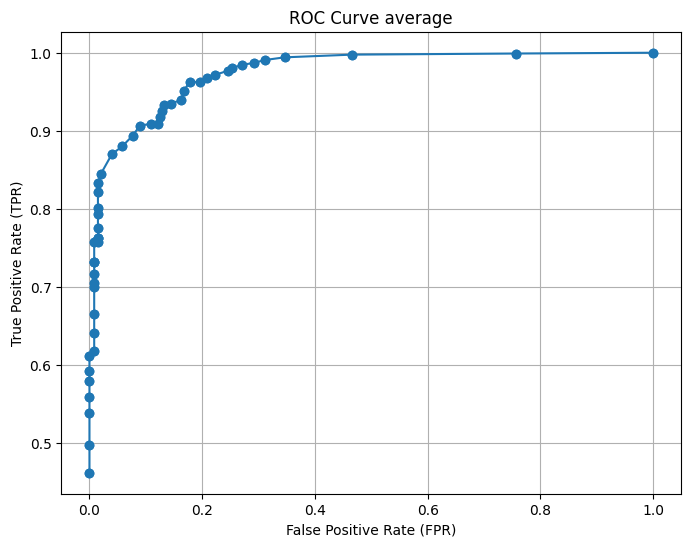

The AUC for the ROC curve is: 0.97488260


In [89]:
results = process_data_average(50)
print(results)
create_roc_auc(results, 'average')

[{'Threshold': 0.0, 'tp': 6930, 'fp': 5120, 'fn': 0, 'tn': 0}, {'Threshold': 0.010101010101010102, 'tp': 6910, 'fp': 1665, 'fn': 20, 'tn': 3455}, {'Threshold': 0.020202020202020204, 'tp': 6892, 'fp': 1388, 'fn': 38, 'tn': 3732}, {'Threshold': 0.030303030303030304, 'tp': 6885, 'fp': 1207, 'fn': 45, 'tn': 3913}, {'Threshold': 0.04040404040404041, 'tp': 6876, 'fp': 1124, 'fn': 54, 'tn': 3996}, {'Threshold': 0.050505050505050504, 'tp': 6870, 'fp': 984, 'fn': 60, 'tn': 4136}, {'Threshold': 0.06060606060606061, 'tp': 6857, 'fp': 860, 'fn': 73, 'tn': 4260}, {'Threshold': 0.0707070707070707, 'tp': 6831, 'fp': 804, 'fn': 99, 'tn': 4316}, {'Threshold': 0.08080808080808081, 'tp': 6813, 'fp': 782, 'fn': 117, 'tn': 4338}, {'Threshold': 0.09090909090909091, 'tp': 6785, 'fp': 704, 'fn': 145, 'tn': 4416}, {'Threshold': 0.10101010101010101, 'tp': 6780, 'fp': 656, 'fn': 150, 'tn': 4464}, {'Threshold': 0.1111111111111111, 'tp': 6752, 'fp': 640, 'fn': 178, 'tn': 4480}, {'Threshold': 0.12121212121212122, '

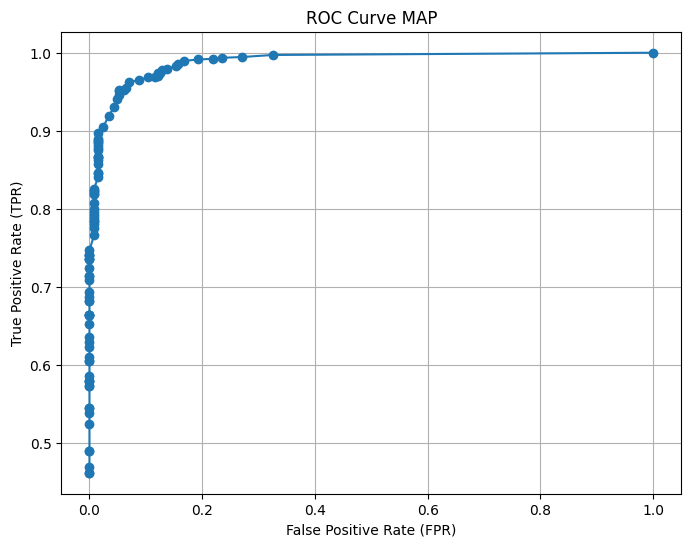

The AUC for the ROC curve is: 0.98842628


In [90]:
results = process_data_MAP(50)
print(results)
create_roc_auc(results, 'MAP')